# Setup notebook

In [14]:
#Setup dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Treat outliers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#Treat numerical values
from sklearn.preprocessing import OneHotEncoder



#Option for displaying rows, columns in notebook
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Reading dataset

In [5]:
path = pd.ExcelFile('raw_dataset/Healthcare_dataset.xlsx')
df= pd.read_excel(path, 'Dataset')

# Exploring Dataset

In [17]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [18]:
df.shape

(3424, 69)

In [19]:
df.dtypes.value_counts()

object    67
int64      2
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

 **Class Distribution**
 
 **Calculate percentage of Persistent  and Non-Persistent in the dataset**

In [ ]:
#Get total number of Persistency and Non-Persistency in Persistency_Flag column
types= df['Persistency_Flag'].value_counts()
print(types)


In [ ]:
#Calculate the percentage of Persistency and Non-Persistency
Flag= round(types[0]/df['Persistency_Flag'].count()*100,2)
Non_Flag=round(types[1]/df['Persistency_Flag'].count()*100,2)
#prin the result
print("Persistent : {} %".format(Flag))
print("Non-Persistent : {} %".format(Non_Flag))

# Checking Missing Value/Null data

In [10]:
#df.isnull().sum()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col,pct_missing))
    
#No missing data

Ptid - 0.0
Persistency_Flag - 0.0
Gender - 0.0
Race - 0.0
Ethnicity - 0.0
Region - 0.0
Age_Bucket - 0.0
Ntm_Speciality - 0.0
Ntm_Specialist_Flag - 0.0
Ntm_Speciality_Bucket - 0.0
Gluco_Record_Prior_Ntm - 0.0
Gluco_Record_During_Rx - 0.0
Dexa_Freq_During_Rx - 0.0
Dexa_During_Rx - 0.0
Frag_Frac_Prior_Ntm - 0.0
Frag_Frac_During_Rx - 0.0
Risk_Segment_Prior_Ntm - 0.0
Tscore_Bucket_Prior_Ntm - 0.0
Risk_Segment_During_Rx - 0.0
Tscore_Bucket_During_Rx - 0.0
Change_T_Score - 0.0
Change_Risk_Segment - 0.0
Adherent_Flag - 0.0
Idn_Indicator - 0.0
Injectable_Experience_During_Rx - 0.0
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms - 0.0
Comorb_Encounter_For_Immunization - 0.0
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx - 0.0
Comorb_Vitamin_D_Deficiency - 0.0
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified - 0.0
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx - 0.0
Comorb_Long_Term_Current_Drug_Therapy - 0.0
Comorb_Dorsalgia - 0.0
Comorb_Personal_H

Based on the quick checking, there is no missing data in the dataset! 

In [11]:
#Print the input data of each variable
for col in df: #print the unique of each column
    print("column_name:",col,"---unique:", df[col].unique())

column_name: Ptid ---unique: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
column_name: Persistency_Flag ---unique: ['Persistent' 'Non-Persistent']
column_name: Gender ---unique: ['Male' 'Female']
column_name: Race ---unique: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
column_name: Ethnicity ---unique: ['Not Hispanic' 'Hispanic' 'Unknown']
column_name: Region ---unique: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
column_name: Age_Bucket ---unique: ['>75' '55-65' '65-75' '<55']
column_name: Ntm_Speciality ---unique: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT 

## Outlier Analysis

Because we only have two numerical columns so we will focus only in these two columns

In [21]:
df.corr(method="pearson", min_periods=1)

,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


### Identifying Outliers with Interquartile Range (IQR)

The difference between the 75th and 25th percentiles is being used to compute the interquartile range (IQR), which is a measure of statistical dispersion. IQR = Q3 Q1 is the formula for calculating it. 

For each of the variables in the dataset, the lines of code below calculate and report the interquartile range.

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Dexa_Freq_During_Rx    3.0
Count_Of_Risks         2.0
dtype: float64


The above output prints the IQR scores, which can be used to detect outliers. It suggests that both these variables have outliers in their data. Let's check different approaches before implementing solutions to deal with outliers in these variable.

### Identifying Outliers with Skewness and Kurtosis Value


In [23]:
#How much is the skewness
print("Dexa_Freq_During_Rx skewness: ",df["Dexa_Freq_During_Rx"].skew())
print("Dexa_Freq_During_Rx Kurtosis: ",df["Dexa_Freq_During_Rx"].kurt())


Dexa_Freq_During_Rx skewness:  6.8087302112992285
Dexa_Freq_During_Rx Kurtosis:  74.75837754795428


In [24]:
#How much is the skewness
print("Count of risks skewness: ",df["Count_Of_Risks"].skew())
print("Count of risks Kurtosis: ",df["Count_Of_Risks"].kurt())


Count of risks skewness:  0.8797905232898707
Count of risks Kurtosis:  0.9004859968892842


For "Dexa Freq During Rx," the value of skewness and Kurtosis suggest that this variable has a lot of outliers, which takes into account a lot of outliers. Furthermore, the data for "Count of Risk" has a moderate skewness and is moderately kurtosis(Platykurtic), indicating that there are few outliers.

Let's visualize these variable to vertify the outliers in these variable. 

### Identifying Outliers with Boxplot


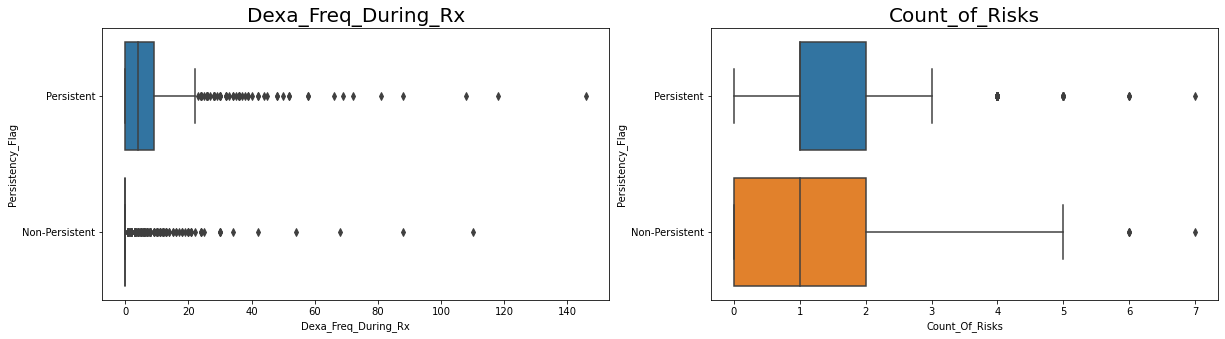

In [25]:
#Outliers
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x= df['Dexa_Freq_During_Rx'], y = df['Persistency_Flag'])
plt.title('Dexa_Freq_During_Rx', fontsize=20)
plt.subplot(122)
sns.boxplot(x= df['Count_Of_Risks'],  y = df['Persistency_Flag'])
plt.title('Count_of_Risks', fontsize=20)
plt.show()

Ase we can see on these graphs, it is clearly to conclude that both Dexa_Freq_During_Rx and Count_of_Risks variables have outliers. Therefore, we will implement solutions to deal with this issue


### Data Transformation to resolve outliers 

**IQR method with RobustScaler**

My first approach to deal with the skewness and outliers for these variables is using IQR Score. To remove outliers, this approach uses the IQR values calculated before. Anything outside of the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is considered an outlier and should be eliminated.

In this project, I will use RobustScaler() to scale the values of both Dexa_Freq_During_Rx and Count_of_Risks, and remove any data outside of the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) or two whiskers. 

In [26]:
# For Dexa_Freq_During_Rx
scaler = RobustScaler()
df['Dexa_Freq_During_Rx'] = scaler.fit_transform(df['Dexa_Freq_During_Rx'].values.reshape(-1,1))

In [27]:
# Identify the IQR for Dexa_Freq_During_Rx
''' Detection '''
# IQR
Q1 = np.percentile(df['Dexa_Freq_During_Rx'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Dexa_Freq_During_Rx'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 

Old Shape:  (3424, 69)


In [28]:
# Identify the Range of IQR upper and lower bound  
# Upper bound
upper = np.where(df['Dexa_Freq_During_Rx'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Dexa_Freq_During_Rx'] <= (Q1-1.5*IQR)) 

In [29]:
# Any data out of this upper and lower bound will be removed
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

# Checking New Shape
print("New Shape: ", df.shape)
df = df.reset_index(drop=True)

New Shape:  (2964, 69)


In [30]:
# For Count of Risks Variable
scaler = RobustScaler()
df['Count_Of_Risks'] = scaler.fit_transform(df['Count_Of_Risks'].values.reshape(-1,1))

In [31]:
# Identify the IQR for  Count of Risks
''' Detection '''
# IQR
Q1 = np.percentile(df['Count_Of_Risks'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Count_Of_Risks'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 

Old Shape:  (2964, 69)


In [32]:
# Identify the Range of IQR upper and lower bound  
# Upper bound
upper = np.where(df['Count_Of_Risks'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Count_Of_Risks'] <= (Q1-1.5*IQR)) 

In [33]:
# Any data out of this upper and lower bound will be removed
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

# Checking New Shape
print("New Shape: ", df.shape)
df = df.reset_index(drop=True)

New Shape:  (2942, 69)


# **Data Wrangling , Transformation and Standardization**


## Assign Value to Y and N, and Persistent and Non-Persistent
**Encode Categorical Value**

 We  need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use OneHotEncoder() provided by sklearn. Basically it will transform a categorical column from this (example to describe this approach):

| marital | housing |
|----------|---------|
| single   | yes     |
| divorced | no      |
| married  | no      |

...into something like this...

| marital_single | marital_divorced | marital_married | housing_yes | housing_no |
|----------------|------------------|-----------------|-------------|------------|
| 1              | 0                | 0               | 1           | 0          |
| 0              | 1                | 0               | 0           | 1          |
| 0              | 0                | 1               | 0           | 1          |

In this code cell we will also encode our label column by replacing 'yes' and 'no' with 1 and 0 respectively. We can do this by applying simple lambda/in-line function on the column.

In [37]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,-0.5
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,-0.5
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,0.5
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0.0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,0.0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0.0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,0.0


In [34]:
#manual replace Persisten and Non-Persisten to 0 and 1
#value = {'N': 0, 'Y':1}
#df = df.replace(value)
#df['Persistency_Flag'] = df['Persistency_Flag'].replace(['Non-Persistent', 'Persistent'],[0, 1])
#df.head()

In [44]:
#with lamda/in-line function

encoder = OneHotEncoder(sparse=False)
cat_cols = ['Gender', 'Race', 'Ethnicity', 'Region','Ntm_Speciality' ,'Ntm_Speciality_Bucket', 'Age_Bucket',
            'Adherent_Flag', 'Change_Risk_Segment',
            'Change_T_Score','Tscore_Bucket_During_Rx', 'Risk_Segment_During_Rx','Tscore_Bucket_Prior_Ntm',
            'Risk_Segment_Prior_Ntm']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_health_ready = df.drop(cat_cols,axis=1)
df_health_ready = pd.concat([df_encoded, df_health_ready], axis=1)

# Encode target value
df_health_ready['Persistency_Flag'] = df_health_ready['Persistency_Flag'].apply(lambda x: 1 if x == 'Persistent' else 0)

print('Shape of dataframe:', df_health_ready.shape)
df_health_ready.head()

Shape of dataframe: (2942, 131)


,Gender_Female,Gender_Male,Race_African American,Race_Asian,Race_Caucasian,Race_Other/Unknown,Ethnicity_Hispanic,Ethnicity_Not Hispanic,Ethnicity_Unknown,Region_Midwest,Region_Northeast,Region_Other/Unknown,Region_South,Region_West,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_CLINICAL NURSE SPECIALIST,Ntm_Speciality_EMERGENCY MEDICINE,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GASTROENTEROLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_HOSPITAL MEDICINE,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_NUCLEAR MEDICINE,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_OCCUPATIONAL MEDICINE,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OPHTHALMOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_ORTHOPEDICS,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PAIN MEDICINE,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_PLASTIC SURGERY,Ntm_Speciality_PODIATRY,Ntm_Speciality_PSYCHIATRY AND NEUROLOGY,Ntm_Speciality_PULMONARY MEDICINE,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_UROLOGY,Ntm_Speciality_Unknown,Ntm_Speciality_VASCULAR SURGERY,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_<55,Age_Bucket_>75,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Change_Risk_Segment_Improved,Change_Risk_Segment_No change,Change_Risk_Segment_Unknown,Change_Risk_Segment_Worsened,Change_T_Score_Improved,Change_T_Score_No change,Change_T_Score_Unknown,Change_T_Score_Worsened,Tscore_Bucket_During_Rx_<=-2.5,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Unknown,Risk_Segment_During_Rx_HR_VHR,Risk_Segment_During_Rx_Unknown,Risk_Segment_During_Rx_VLR_LR,Tscore_Bucket_Prior_Ntm_<=-2.5,Tscore_Bucket_Prior_Ntm_>-2.5,Risk_Segment_Prior_Ntm_HR_VHR,Risk_Segment_Prior_Ntm_VLR_LR,Ptid,Persistency_Flag,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0